## Pronóstico de Ventas con LSTM
 
Este notebook demuestra la implementación de redes neuronales LSTM (Long Short-Term Memory) para el pronóstico de ventas (forecast). 

En este punto el modelo se entrena con datos sintéticos de ventas con diferentes patrones, primeramente para lograr una base que identifique patrones estacionarios y de tendencia y asi posteriormente seguir su desarrollo para obtener un modelo mas robusto:
 
 - Patrón senoidal: Ventas que siguen una curva sinusoidal para simular patrones estacionales
 - Patrón de fin de semana: Ventas con valores incrementados durante los fines de semana
 
 La implementación incluye:
 - Generación de datos con parámetros configurables
 - Creación y entrenamiento del modelo LSTM
 - Visualización de predicciones de ventas
 - Evaluación de métricas de error
 
 El código utiliza TensorFlow/Keras para la implementación LSTM e incluye características como:
 - Longitud de secuencia configurable
 - Múltiples arquitecturas de modelo
 - Detención temprana
 - Características adicionales opcionales (día de la semana, mes, etc.)



### Caso de prueba para datos con patrón de fin de semana
 Se generarán datos sintéticos con las siguientes características:
 - Ventas base de 1000 unidades
 - Incremento del doble en fines de semana (weekend_boost=2)
 - Sin variación mensual (monthly_variation=0)
 - Ruido aleatorio del 5% (noise_level=0.05)
 - Tendencia positiva leve (trend_factor=0.001)


2025-04-25 08:15:38.392038: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-25 08:15:38.404419: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745590538.417962 1049356 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745590538.422143 1049356 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-25 08:15:38.437753: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2023-01-01 to 2024-12-31
Freq: D
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         731 non-null    int32  
 1   month        731 non-null    int32  
 2   day_of_week  731 non-null    int32  
 3   day_of_year  731 non-null    int32  
 4   is_weekend   731 non-null    bool   
 5   ventas       731 non-null    float64
 6   season       731 non-null    object 
dtypes: bool(1), float64(1), int32(4), object(1)
memory usage: 29.3+ KB
None

Estadísticas descriptivas:
count     731.000000
mean     1753.039058
std       681.764431
min       906.134307
25%      1263.773035
50%      1517.478415
75%      2171.135445
max      3491.268971
Name: ventas, dtype: float64

Tamaño del conjunto de entrenamiento: 657
Tamaño del conjunto de prueba: 74

Preparando datos para el modelo LSTM...


/mnt/c/Users/omarm/Documents/Diplomado_IA/diplomado-ia-f/omarjh/forecast_lstm/models.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["season_ordinal"] = df["season"].map(



Número de características: 1

Creando y entrenando el modelo LSTM...


2025-04-25 08:15:39.734293: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/omarjh/.cache/pypoetry/virtualenvs/diplomado-ia-Zsy5ah72-py3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 256)         │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 7, 128)         │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 529,409 (2.02 MB)

 Trainable params: 529,409 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 0.9093 - mae: 0.2665 - val_loss: 0.8626 - val_mae: 0.2753
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.8024 - mae: 0.1746 - val_loss: 0.7533 - val_mae: 0.2490
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.7339 - mae: 0.2214 - val_loss: 0.7055 - val_mae: 0.1813
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.6712 - mae: 0.1778 - val_loss: 0.6441 - val_mae: 0.1831
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.6114 - mae: 0.1830 - val_loss: 0.5798 - val_mae: 0.2126
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.5605 - mae: 0.2132 - val_loss: 0.5277 - val_mae: 0.2129
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.5095 - mae: 0.1904 - val_loss: 0.4937 - val_mae: 0.1764
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.4659 - mae: 0.1558 - val_loss: 0.4407 - val_mae: 0.1700
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.4196 - mae: 0.1528 -

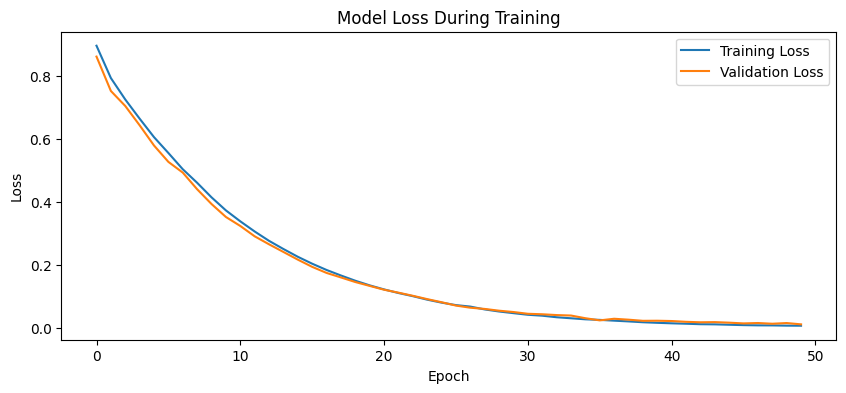


Prediciendo ventas futuras...
se uso solo ventas
se uso solo ventas

Comparación de predicciones:
[[0.27812048]
 [0.95730174]
 [1.        ]
 [0.30011695]
 [0.2935182 ]
 [0.28984146]
 [0.27842968]]

Primeras 10 predicciones de la predicción larga:
[2431.0188 3112.396  3056.6733 1494.7208 1487.7599 1536.3444 1952.464
 2911.179  3057.5254 2951.2576]

Predicciones de 10 días:
[2431.0188 3112.396  3056.6733 1494.7208 1487.7599 1536.3444 1952.464
 2911.179  3057.5254 2951.2576]

Diferencia absoluta máxima: 0.0
¿Son idénticas?: True

Visualizando datos históricos...


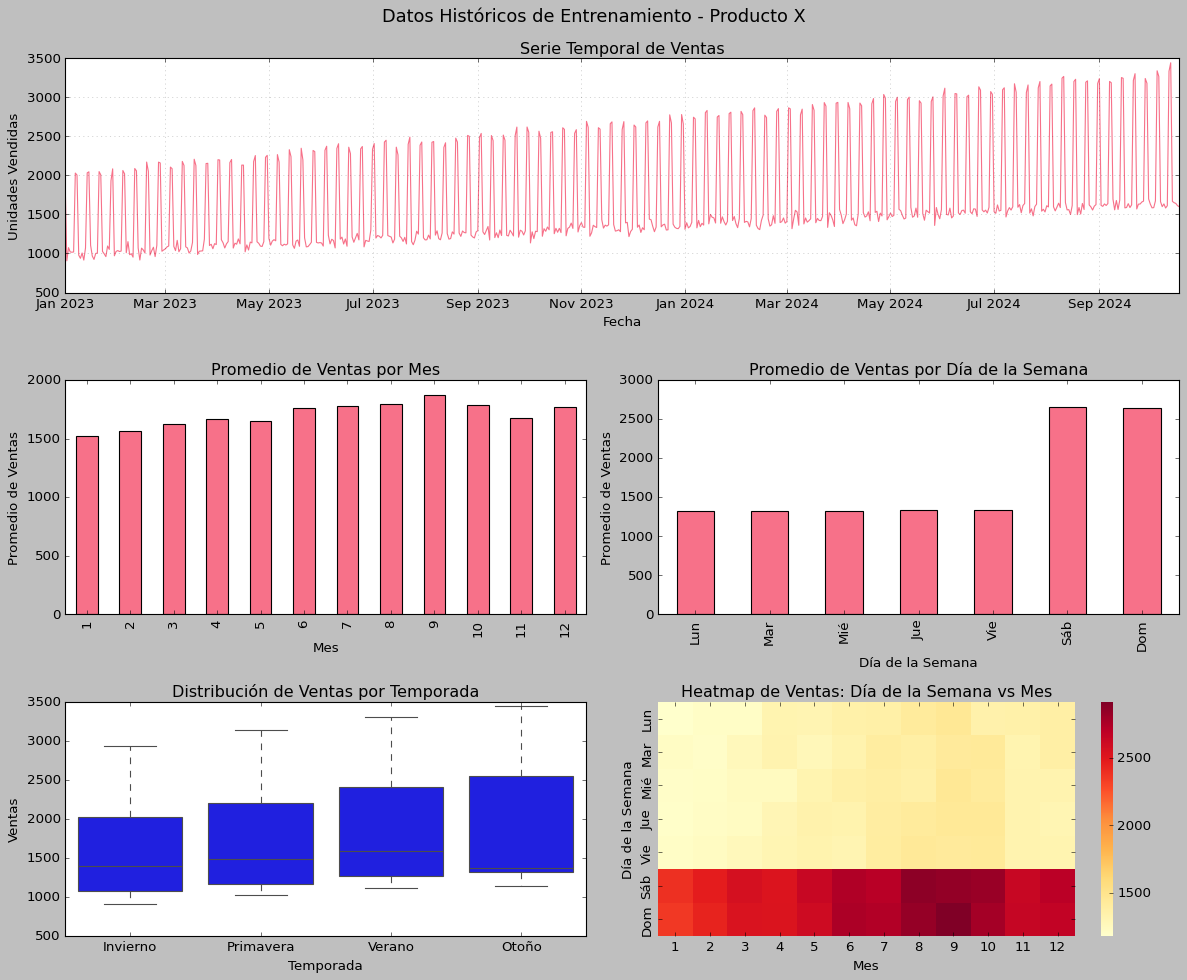


Visualizando predicciones...


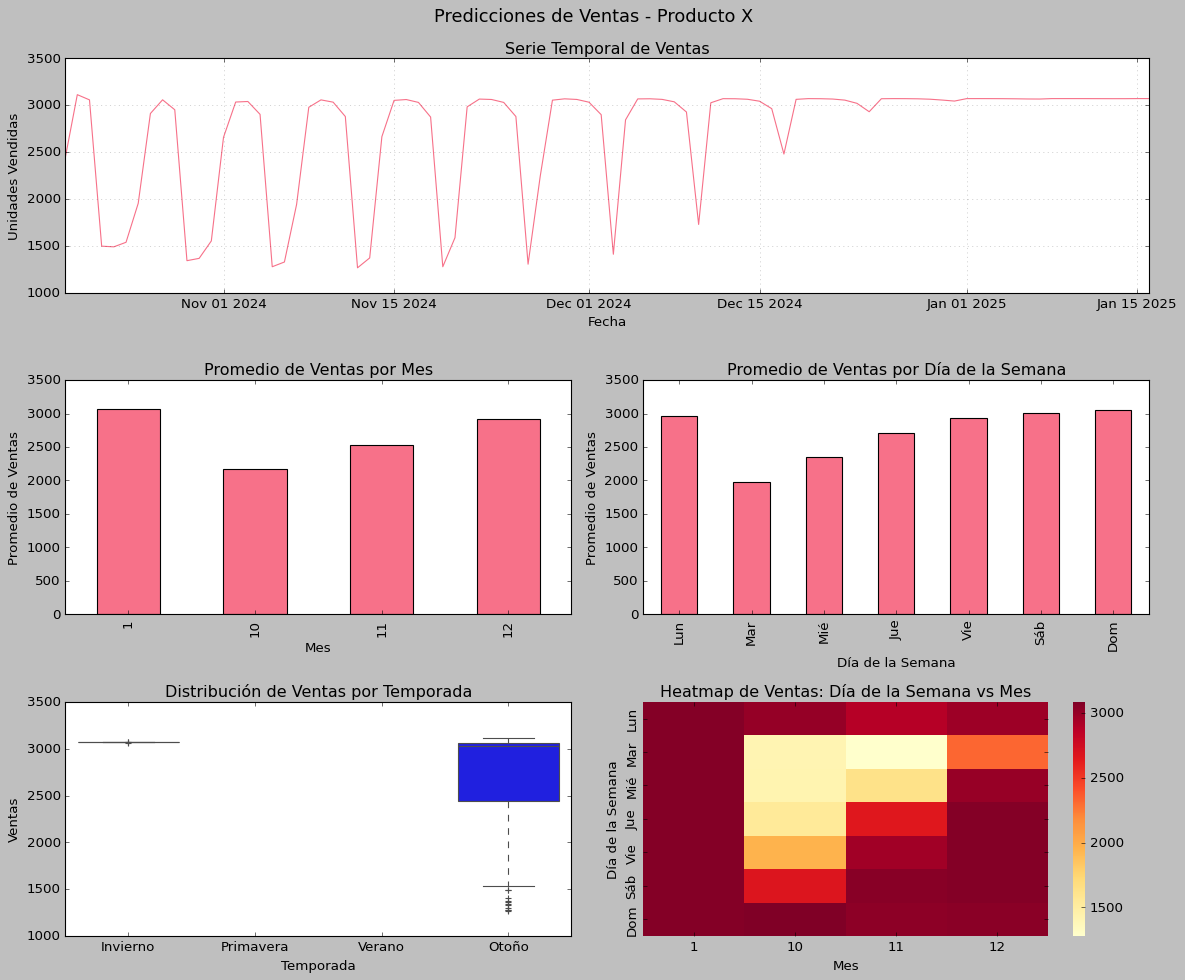

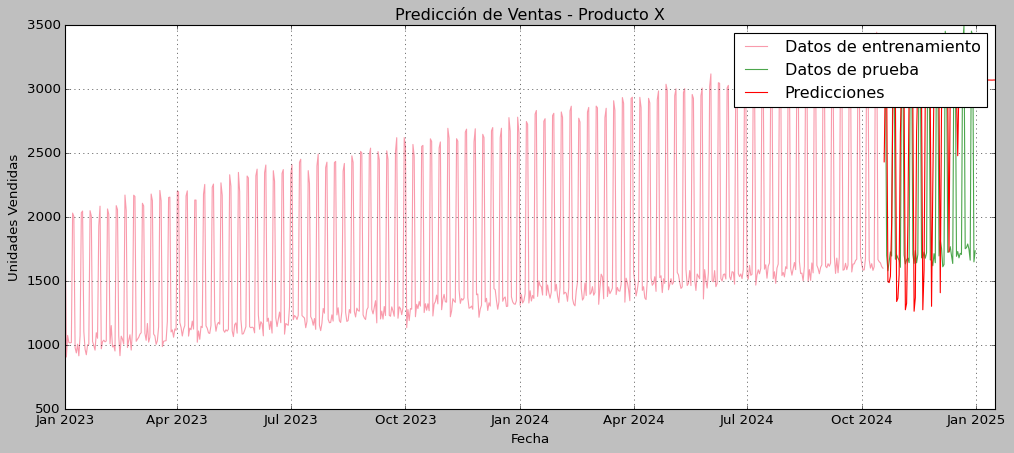

se uso solo ventas

Métricas de error en el conjunto de prueba:
MAE: 757.63
MSE: 820723.56
RMSE: 905.94
MAPE: 41.76%

Proceso completado ╰(*°▽°*)╯


In [1]:
from sales_data import generate_senoidal_sales_data, generate_weekend_sales_data
from main import main

df_sin = generate_senoidal_sales_data()
df_weekend = generate_weekend_sales_data(start_date="2023-01-01", end_date="2024-12-31",
                                         base_sales=1000,
                                         weekend_boost=2, monthly_variation=0.0,
                                         noise_level=0.05, trend_factor=0.001)

main(df=df_weekend, epochs=50, batch_size=128, sequence_length=7,
      days_to_predict=90, type_model="deep_2", features=[])

### Caso de prueba para datos con patrón senoidal
Se generarán datos sintéticos con que buscan representar los patrones estacionales a los largo de un año.



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2022-01-01 to 2023-12-31
Freq: D
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   year         730 non-null    int32   
 1   month        730 non-null    int32   
 2   day_of_week  730 non-null    int32   
 3   day_of_year  730 non-null    int32   
 4   ventas       730 non-null    float64 
 5   is_weekend   730 non-null    bool    
 6   season       730 non-null    category
dtypes: bool(1), category(1), float64(1), int32(4)
memory usage: 24.4 KB
None

Estadísticas descriptivas:
count     730.000000
mean     1004.482192
std       406.842818
min       360.000000
25%       659.500000
50%       962.500000
75%      1330.000000
max      2312.000000
Name: ventas, dtype: float64

Tamaño del conjunto de entrenamiento: 657
Tamaño del conjunto de prueba: 73

Preparando datos para el modelo LSTM...

Número de características: 1

Crea

/mnt/c/Users/omarm/Documents/Diplomado_IA/diplomado-ia-f/omarjh/forecast_lstm/models.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["season_ordinal"] = df["season"].map(
/home/omarjh/.cache/pypoetry/virtualenvs/diplomado-ia-Zsy5ah72-py3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 180, 256)       │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 180, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 180, 128)       │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 180, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 529,409 (2.02 MB)

 Trainable params: 529,409 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 820ms/step - loss: 0.9410 - mae: 0.3053 - val_loss: 0.8628 - val_mae: 0.1727
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 652ms/step - loss: 0.8552 - mae: 0.1755 - val_loss: 0.8136 - val_mae: 0.1485
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 630ms/step - loss: 0.8068 - mae: 0.1423 - val_loss: 0.7856 - val_mae: 0.1870
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 645ms/step - loss: 0.7687 - mae: 0.1418 - val_loss: 0.7343 - val_mae: 0.1437
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 628ms/step - loss: 0.7258 - mae: 0.1320 - val_loss: 0.6959 - val_mae: 0.1347
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 653ms/step - loss: 0.6890 - mae: 0.1367 - val_loss: 0.6632 - val_mae: 0.1465
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 626ms/step - loss: 0.6531 - mae: 0.1253 - val_loss: 0.6304 - val_mae: 0.1492
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 623ms/step - loss: 0.6188 - mae: 0.1228 - val_loss: 0.5920 - val_mae: 0.1276
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 617ms/step - loss: 0.584

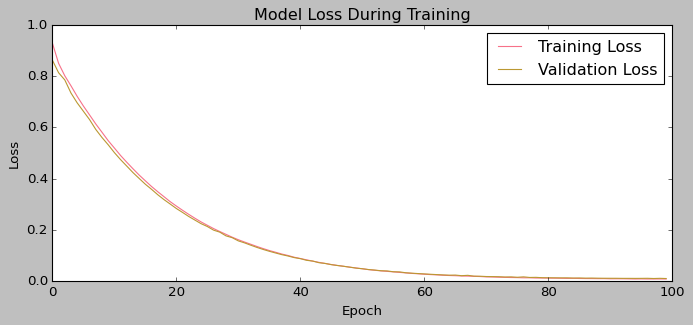


Prediciendo ventas futuras...
se uso solo ventas
se uso solo ventas

Comparación de predicciones:
[[0.06711066]
 [0.0630123 ]
 [0.16188525]
 [0.1567623 ]
 [0.15061475]
 [0.1454918 ]
 [0.14088115]
 [0.03995902]
 [0.03688525]
 [0.12704918]
 [0.27715164]
 [0.11936475]
 [0.11577869]
 [0.11321721]
 [0.02151639]
 [0.01946721]
 [0.10502049]
 [0.10348361]
 [0.10143443]
 [0.09989754]
 [0.09887295]
 [0.01331967]
 [0.01331967]
 [0.09733607]
 [0.09682377]
 [0.09784836]
 [0.09887295]
 [0.09938525]
 [0.01536885]
 [0.01639344]
 [0.1045082 ]
 [0.10655738]
 [0.10911885]
 [0.11168033]
 [0.26485656]
 [0.02715164]
 [0.02971311]
 [0.28125   ]
 [0.13012295]
 [0.13370902]
 [0.13883197]
 [0.14395492]
 [0.04918033]
 [0.05276639]
 [0.15983607]
 [0.1664959 ]
 [0.17264344]
 [0.17879098]
 [0.29610656]
 [0.07940574]
 [0.08401639]
 [0.20645492]
 [0.21311475]
 [0.22028689]
 [0.2289959 ]
 [0.23565574]
 [0.11577869]
 [0.27407787]
 [0.2602459 ]
 [0.26895492]
 [0.27715164]
 [0.28586066]
 [0.4369877 ]
 [0.1567623 ]
 [0.1

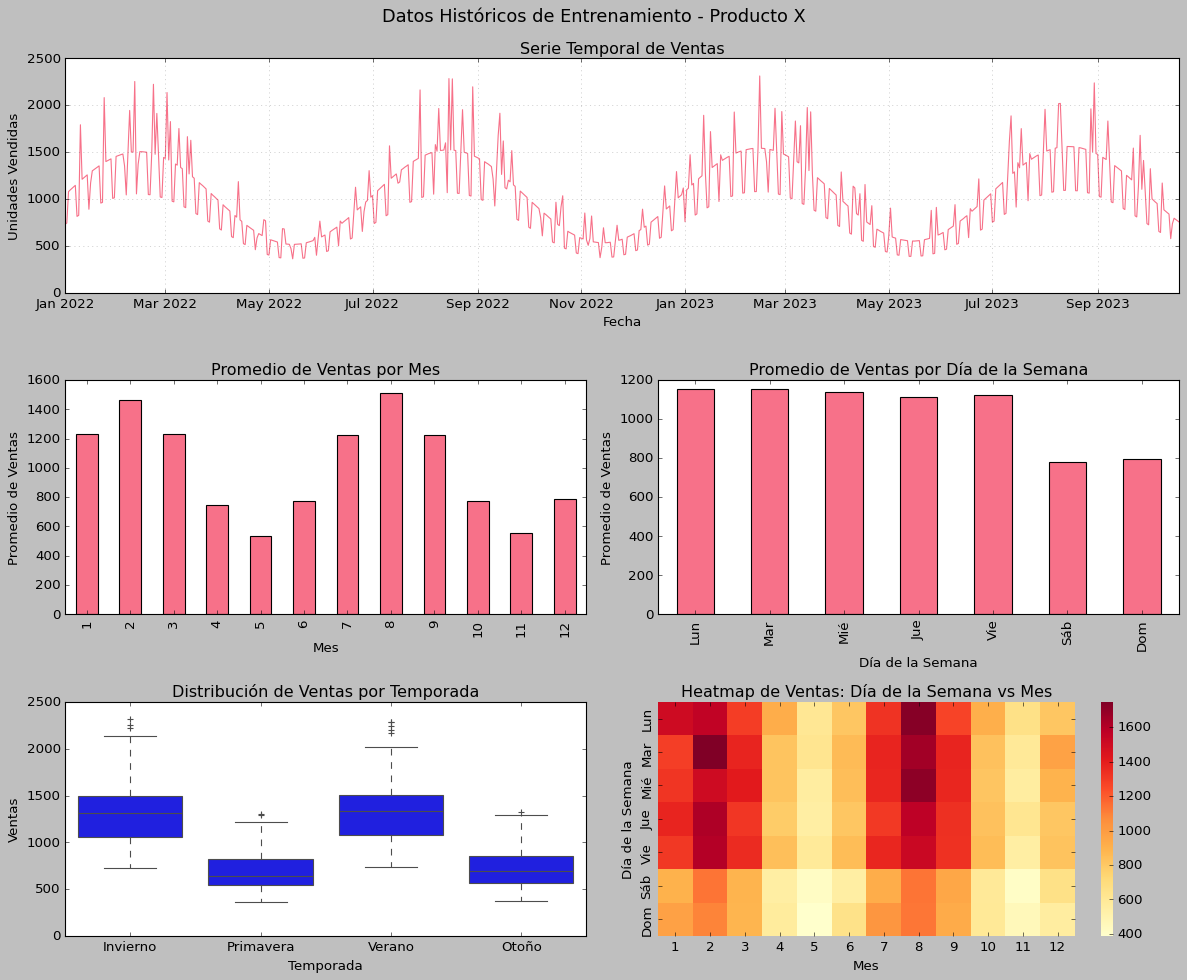


Visualizando predicciones...


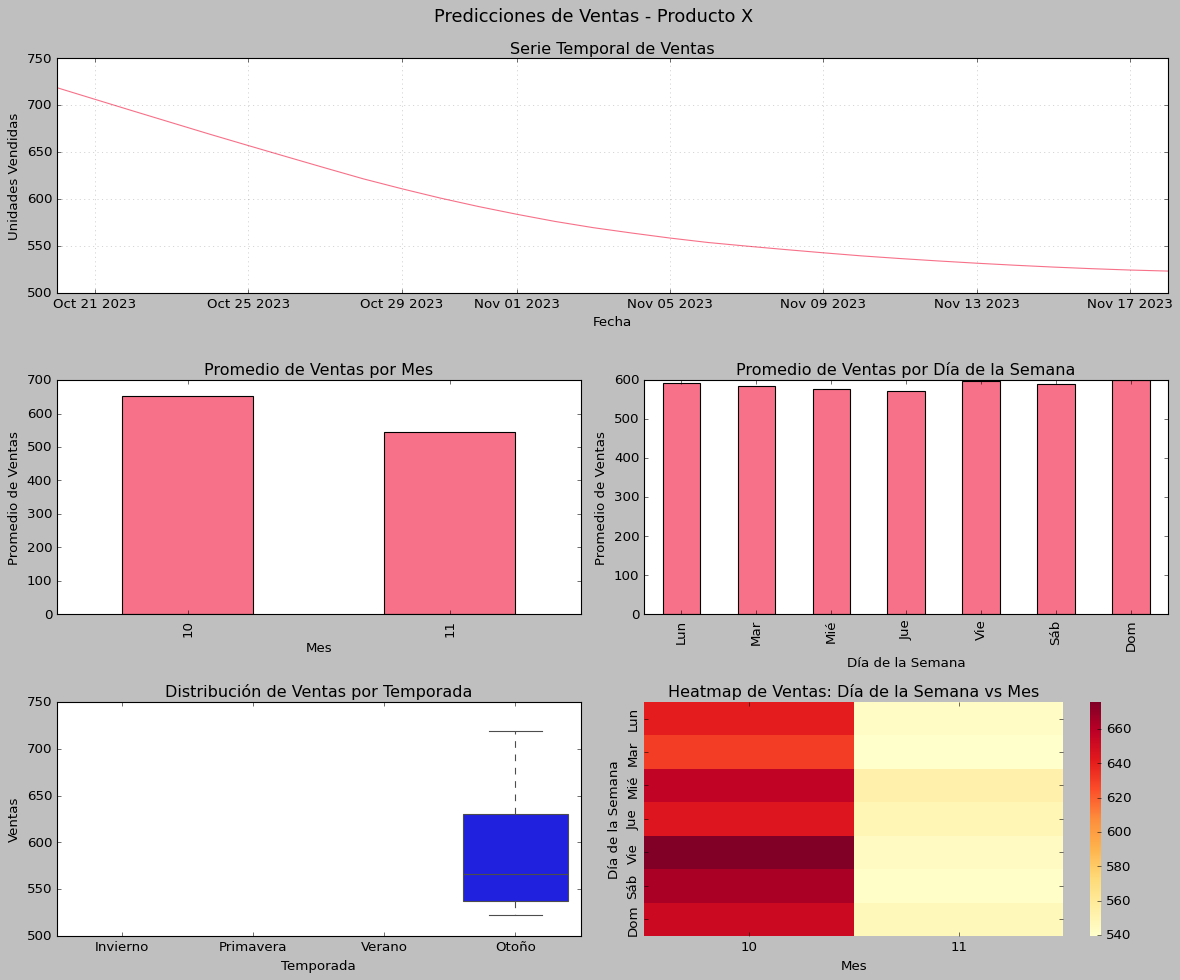

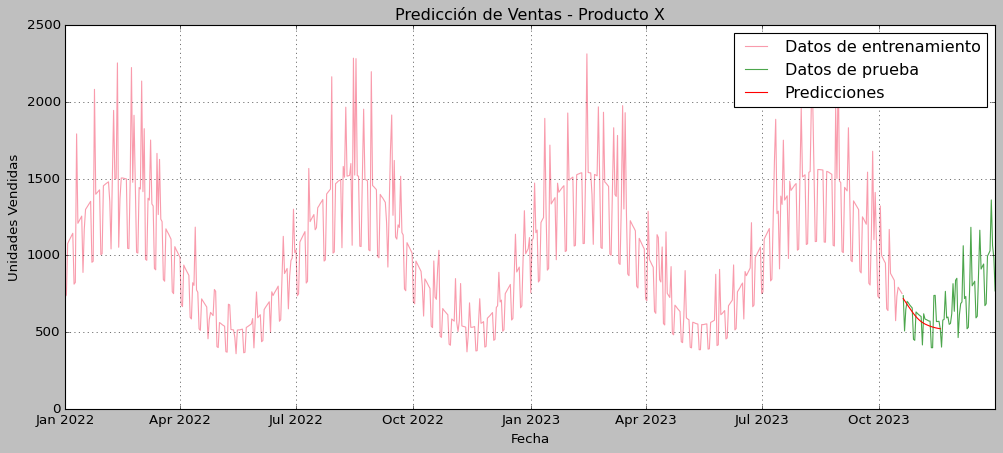

se uso solo ventas

Métricas de error en el conjunto de prueba:
MAE: 138.21
MSE: 36447.26
RMSE: 190.91
MAPE: 18.03%

Proceso completado ╰(*°▽°*)╯


In [2]:
from sales_data import generate_senoidal_sales_data, generate_weekend_sales_data
from main import main

df_sin = generate_senoidal_sales_data()

main(
    df=df_sin,
    epochs=100,
    batch_size=128,
    sequence_length=180,
    days_to_predict=30,
    type_model="deep_2",
    features=[]
)



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2022-01-01 to 2023-12-31
Freq: D
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   year         730 non-null    int32   
 1   month        730 non-null    int32   
 2   day_of_week  730 non-null    int32   
 3   day_of_year  730 non-null    int32   
 4   ventas       730 non-null    float64 
 5   is_weekend   730 non-null    bool    
 6   season       730 non-null    category
dtypes: bool(1), category(1), float64(1), int32(4)
memory usage: 24.4 KB
None

Estadísticas descriptivas:
count     730.000000
mean     1006.224658
std       401.631093
min       360.000000
25%       659.250000
50%       974.500000
75%      1327.750000
max      2318.000000
Name: ventas, dtype: float64

Tamaño del conjunto de entrenamiento: 657
Tamaño del conjunto de prueba: 73

Preparando datos para el modelo LSTM...

Número de características: 1

Crea

/mnt/c/Users/omarm/Documents/Diplomado_IA/diplomado-ia-f/omarjh/forecast_lstm/models.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["season_ordinal"] = df["season"].map(
/home/omarjh/.cache/pypoetry/virtualenvs/diplomado-ia-Zsy5ah72-py3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 180, 256)       │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 180, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 180, 128)       │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 180, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 529,409 (2.02 MB)

 Trainable params: 529,409 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 870ms/step - loss: 0.9504 - mae: 0.3003 - val_loss: 0.8648 - val_mae: 0.1408
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 652ms/step - loss: 0.8646 - mae: 0.1750 - val_loss: 0.8259 - val_mae: 0.1499
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 660ms/step - loss: 0.8159 - mae: 0.1401 - val_loss: 0.8044 - val_mae: 0.2211
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 651ms/step - loss: 0.7818 - mae: 0.1590 - val_loss: 0.7513 - val_mae: 0.1651
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 650ms/step - loss: 0.7338 - mae: 0.1248 - val_loss: 0.7053 - val_mae: 0.1304
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 634ms/step - loss: 0.6978 - mae: 0.1357 - val_loss: 0.6689 - val_mae: 0.1289
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 623ms/step - loss: 0.6607 - mae: 0.1245 - val_loss: 0.6379 - val_mae: 0.1453
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 637ms/step - loss: 0.6264 - mae: 0.1213 - val_loss: 0.6070 - val_mae: 0.1525
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 644ms/step - loss: 0.593

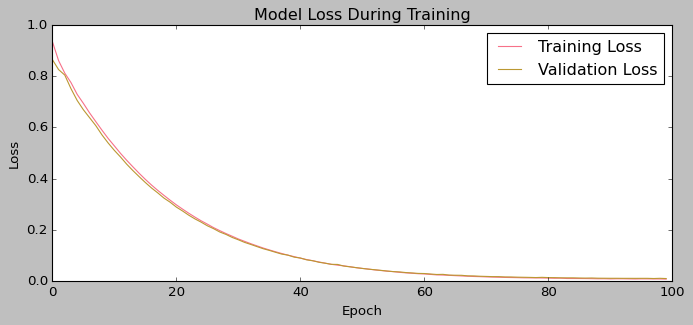


Prediciendo ventas futuras...
se uso solo ventas
se uso solo ventas

Comparación de predicciones:
[[0.06690501]
 [0.13636364]
 [0.1618999 ]
 [0.3258427 ]
 [0.15066394]
 [0.14555669]
 [0.14096016]
 [0.03983657]
 [0.03677222]
 [0.12665986]
 [0.21501532]
 [0.1195097 ]
 [0.1154239 ]
 [0.11235955]
 [0.02145046]
 [0.01991828]
 [0.19101124]
 [0.1031665 ]
 [0.1011236 ]
 [0.10010215]
 [0.18335036]
 [0.01327886]
 [0.01276813]
 [0.09703779]
 [0.09754852]
 [0.09703779]
 [0.09754852]
 [0.09908069]
 [0.01532176]
 [0.01634321]
 [0.10367722]
 [0.10623085]
 [0.10827375]
 [0.11184883]
 [0.11491318]
 [0.02706844]
 [0.02962206]
 [0.12563841]
 [0.28651685]
 [0.13432074]
 [0.13891726]
 [0.14351379]
 [0.0485189 ]
 [0.0526047 ]
 [0.159857  ]
 [0.16547497]
 [0.1721144 ]
 [0.17875383]
 [0.36874362]
 [0.07865169]
 [0.08375894]
 [0.20531154]
 [0.21297242]
 [0.34116445]
 [0.22778345]
 [0.23595506]
 [0.1154239 ]
 [0.12104188]
 [0.25995914]
 [0.26813075]
 [0.27630235]
 [0.51940756]
 [0.29315628]
 [0.15628192]
 [0.1

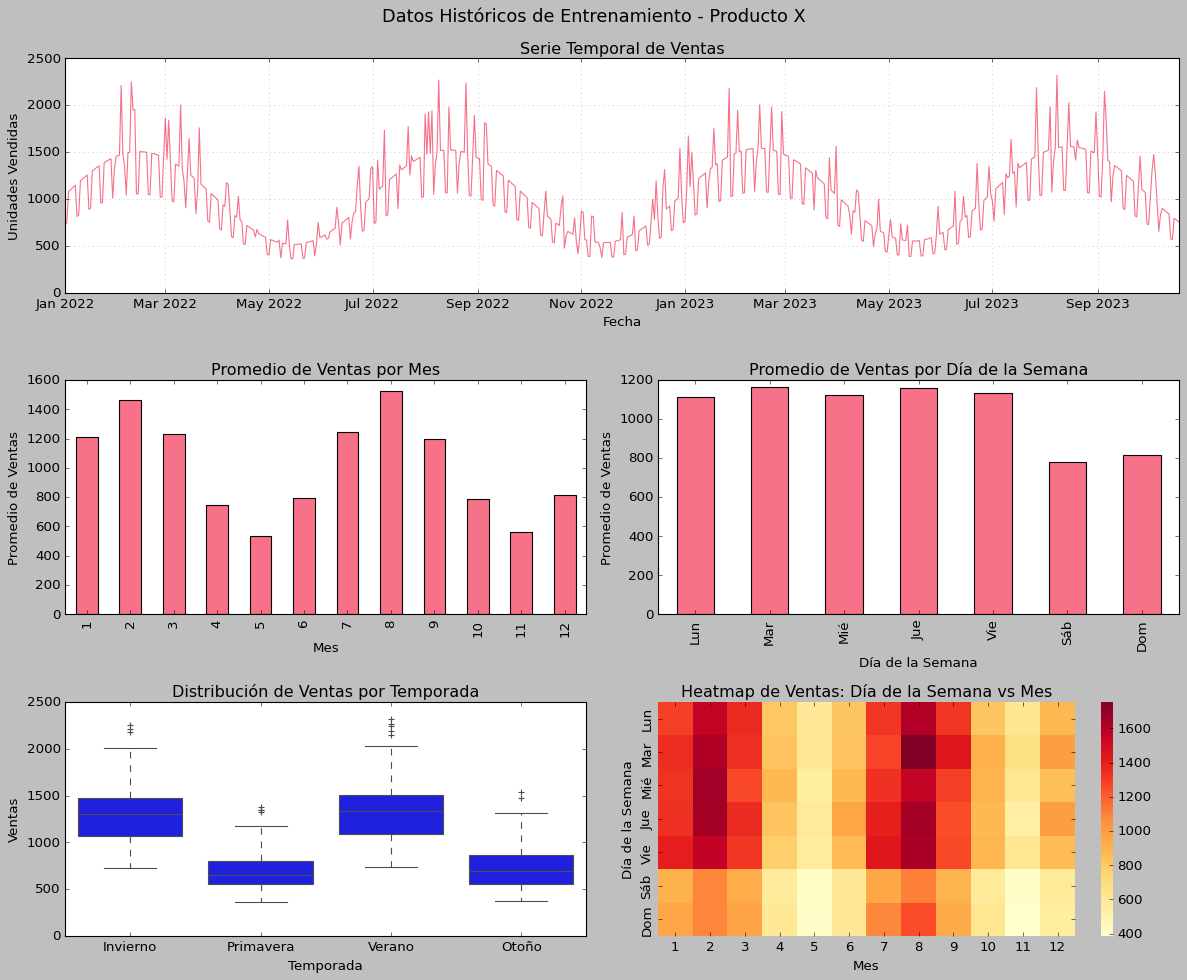


Visualizando predicciones...


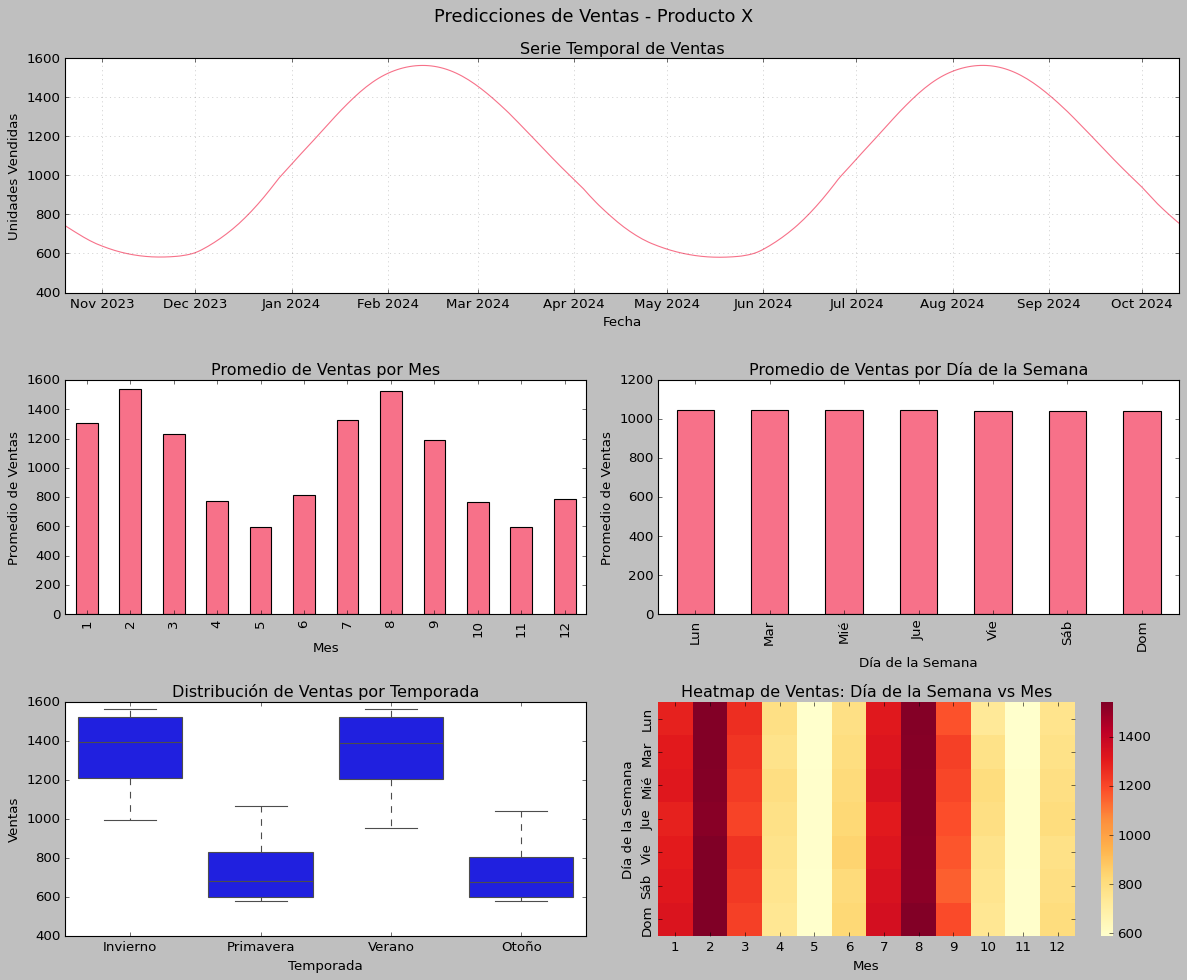

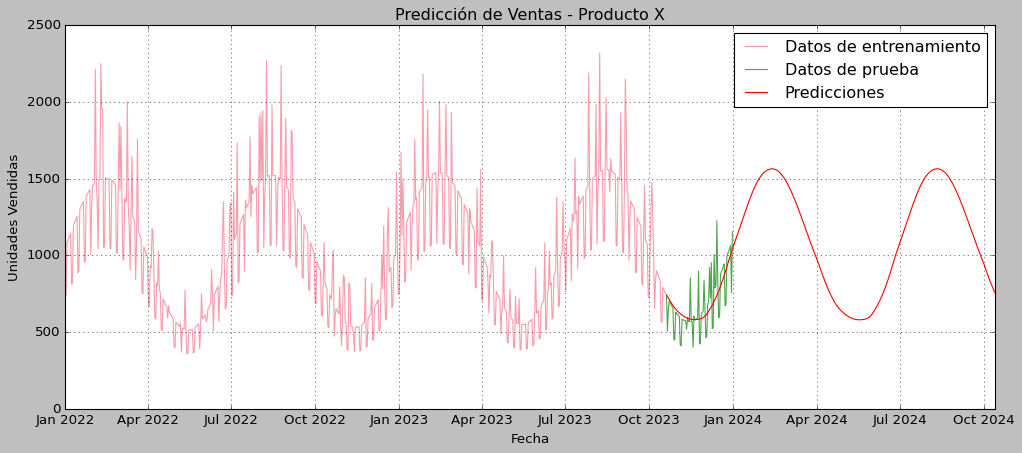

se uso solo ventas

Métricas de error en el conjunto de prueba:
MAE: 100.50
MSE: 19974.65
RMSE: 141.33
MAPE: 15.31%

Proceso completado ╰(*°▽°*)╯


In [3]:
from sales_data import generate_senoidal_sales_data, generate_weekend_sales_data
from main import main

df_sin = generate_senoidal_sales_data()

main(
    df=df_sin,
    epochs=100,
    batch_size=128,
    sequence_length=180,
    days_to_predict=360,
    type_model="deep_2",
    features=[],
)
